## Multiple Linear Regression - Review and Applications
##### Author: Renato da Silva 
##### Date: 02/2026 

##### Objectives
- Use scikit-learn to implement multiple linear regression
- Create, train, and test a multiple linear regression model on real data 

In [3]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# load the dataset
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

df = pd.read_csv(url)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
# Explore and select features
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


- some variables are not included in the description because they are not numerical.
- MODELYEAR is the same for all cars

In [6]:
# drop categoricals and any unnecessary features
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], axis=1)
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


- Let's analyze a correlation matrix to take a look at the relationships among the remaining features
- Let's eliminate any strong dependencies or correlations between features by selecting the best one from each correlated group

In [7]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


- Let's analyze the correlation between each variable and the target "CO2EMISSIONS"
  - all features has high level of correlation, exceeding at least 85%, so all of them are good candidates
- Also, ENGINESIZE and CYLINDERS are highly correlated, but ENGINESIZE is the most correlated with the tarde, so we can drop CYLINDERS
- Similarly, each of the four fuel economy variables is highly correlated with each other. Since FUELCONSUMPTION_COMB_MPG is the most correlated with the tarde, let's drop all the others
- Lastly, FUELCONSUMPTION_COMB and FUELCOSUMPTION_COMB_MPG are not perfectly correlated. However, they should be because they measure the same thing in different units. Here, we have to investigate why this is the case...  

In [8]:
df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB'], axis=1)
df.head()

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244


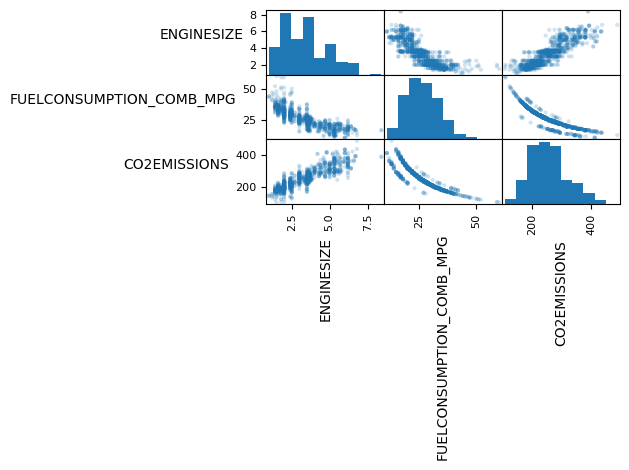

In [9]:
# plotting scatter matrix between the features in the dataset
axes = pd.plotting.scatter_matrix(df, alpha=0.2)

# need to rotate axis labels so we can read them
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [10]:
# extract the input features and labels
X = df.iloc[:,[0,1]].to_numpy()
y = df.iloc[:,2].to_numpy()

- Now, let's stardardize our input features so the model does not inadvertently favor any feature due to its magnitude
- The typical way to do this is to subtract the mean and divide by the standard deviation
- Let's do this with Scikit-learn

In [11]:
# prepocess selected features
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)

In [12]:
pd.DataFrame(X_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


- As you can see, a standardized variable has zero mean and a standard deviation of one.

In [13]:
# create train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

In [14]:
# build a multiple linear regression model
from sklearn import linear_model

# create model object
regr = linear_model.LinearRegression()  

# train model in the training set
regr.fit(X_train, y_train)

# print coefficients
coef_ = regr.coef_
intercept_ = regr.intercept_

print('Coefficients: \n', coef_)
print('Intercept: \n', intercept_)

Coefficients: 
 [ 25.27339614 -37.4381472 ]
Intercept: 
 256.2907248808642


- The coefficients and intercept parameters define best-fit hyperplane to the data
- Since there are only two variables, hence two parameters, the hyperplane is a plane 

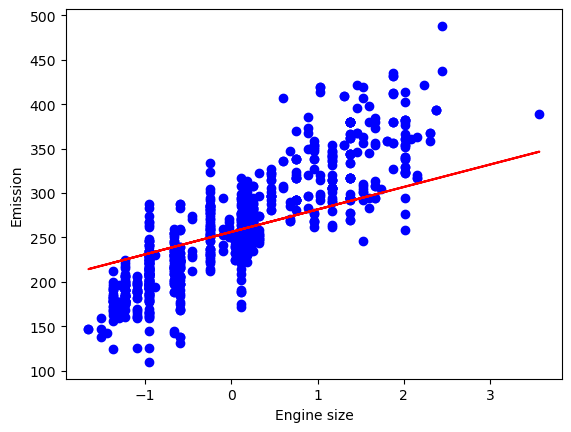

In [20]:
# Visualize the model
plt.scatter(X_train[:,0], y_train,  color='blue')
plt.plot(X_train[:,0], coef_[0] * X_train[:,0] + intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

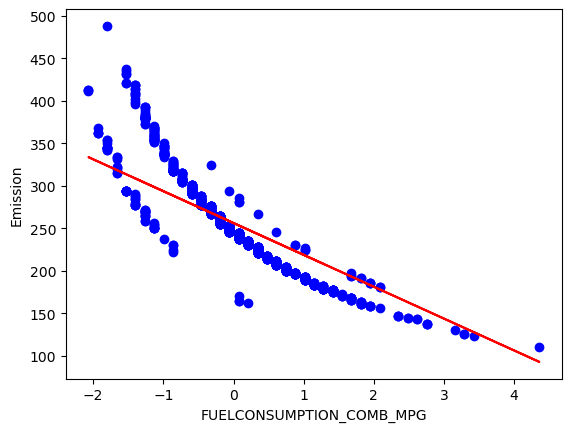

In [25]:
plt.scatter(X_train[:,1], y_train,  color='blue')
plt.plot(X_train[:,1], coef_[1] * X_train[:,1] + intercept_, '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")
plt.show()

The solution is incredibly poor because the model is trying to fit a plane to a non-planar surface

In [ ]:
# best-fit linear regression for CO2 emission and engine size
X_train_1 = X_train[:,0]

regressor_1 = linear_model.LinearRegression()
regressor_1.fit(X_train_1.reshape(-1,1), y_train)
coef_1 = regressor_1.coef_[0]
intercept_1 = regressor_1.intercept_

print ('Coefficients: ',coef_1)
print ('Intercept: ',intercept_1)

Coefficients:  55.18408796509721
Intercept:  256.7718301362164


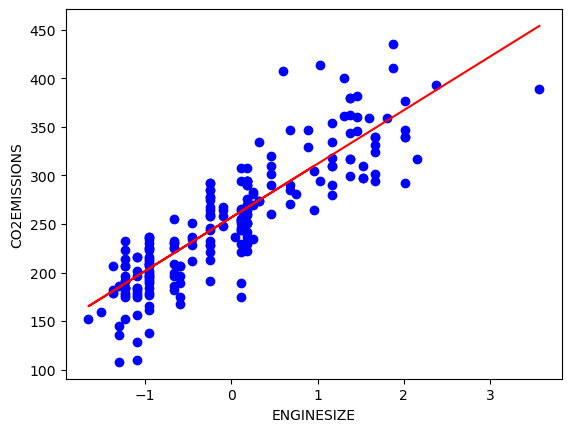

In [27]:
# scatterplot of CO2 emission and engine size with best fit line
plt.scatter(X_test[:,0], y_test, color="blue")
plt.plot(X_test[:,0], regressor_1.coef_[0] * X_test[:,0] + regressor_1.intercept_, color="red")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()  

Simple linear regression model provides a much better fit of CO2 emission on the training data than the multiple regression model did.

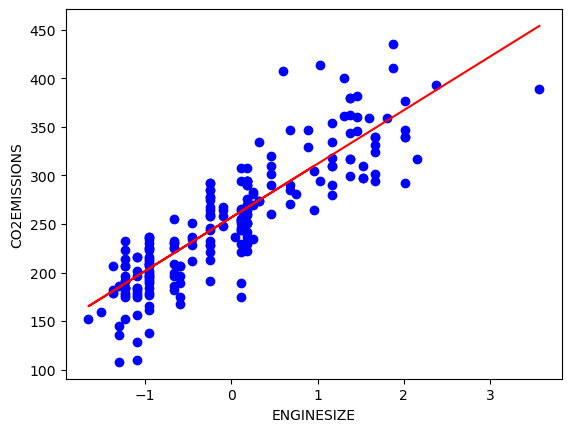

In [30]:
# Doing the same but not with the test dataset
X_test_1 = X_test[:,0]  
plt.scatter(X_test_1, y_test, color="blue")
plt.plot(X_test_1, regressor_1.coef_[0] * X_test_1 + regressor_1.intercept_, color="red")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [31]:
# best-fit linear regression for CO2 emission and FUELDCONSUMPTION_COMB_MPG
X_train_2 = X_train[:,1]

regressor_2 = linear_model.LinearRegression()
regressor_2.fit(X_train_2.reshape(-1,1), y_train)
coef_2 = regressor_2.coef_[0]
intercept_2 = regressor_2.intercept_

print ('Coefficients: ',coef_2)
print ('Intercept: ',intercept_2)

Coefficients:  -58.51827988659666
Intercept:  256.0939217919955


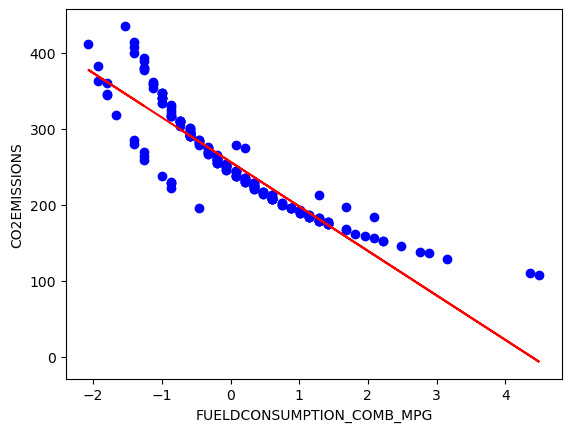

In [32]:
# scatterplot of CO2 emission and FUELDCONSUMPTION_COMB_MPG with best fit line
X_test_2 = X_test[:,1]
plt.scatter(X_test_2, y_test, color="blue")
plt.plot(X_test_2, regressor_2.coef_[0] * X_test_2 + regressor_2.intercept_, color="red")
plt.xlabel("FUELDCONSUMPTION_COMB_MPG")
plt.ylabel("CO2EMISSIONS")
plt.show()  